<a href="https://colab.research.google.com/github/Kartikrahi/-Play-Store-App-Review-Analysis/blob/main/My_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

#**FIRST OF ALL IMPORT ALL LIBRARIES THAT WILL BE USED**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Now mount with google drive and upload csv file **

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/copy/Copy of Play Store Data.csv'

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## ** Make a duplicate of dataframe.**

In [ ]:
df1= df.copy()

## **Information of dataframe**

In [ ]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


*See the numerical values in dataframe*

In [ ]:
df1.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


## *see all the columns in dataframe*

In [ ]:
df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

## No of rows and columns in dataframe

In [ ]:
df1.shape

(10841, 13)

## *Check the null value presend in columns*

In [ ]:
df1.isnull().sum().sort_values(ascending = False)[:6]

Rating            1474
Current Ver          8
Android Ver          3
Type                 1
Content Rating       1
App                  0
dtype: int64

so there are null values in column 'Rating', 'Current Ver', 'Android Ver', 'Type', 'Content Rating'. Now we need to remove those null value or replace with somthing usefull accordingly. 

In [ ]:
df1['Current Ver'].mode()
df1['Android Ver'].mode()
df1['Content Rating'].mode()
df1['Type'].mode()

0    Free
dtype: object

# Cleaning data

In [ ]:
df1['Rating'].fillna(df1['Rating'].mean(),inplace = True)

In [ ]:
df1['Current Ver'].fillna('Varies with device', inplace = True)

In [ ]:
df1['Android Ver'].fillna('4.1 and up', inplace = True)

In [ ]:
df1['Content Rating'].fillna('Everyone', inplace = True)

In [ ]:
df1['Type'].fillna('Free', inplace = True)

In [ ]:
df1.isnull().sum().sort_values(ascending = False)[:6]

App         0
Category    0
Rating      0
Reviews     0
Size        0
Installs    0
dtype: int64

# **Now lets check the OUTLINERS**

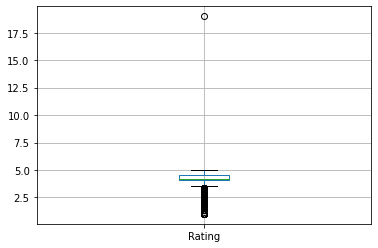

In [ ]:
df1.boxplot();

Rating should be between 0 to 5 but it is showing more than 17.5
there must be some OUTLINERS 

 *drop this row*

In [ ]:
df1[df1['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,Everyone,"February 11, 2018",1.0.19,4.0 and up,4.1 and up


In [ ]:
df1.drop([10472], inplace = True)

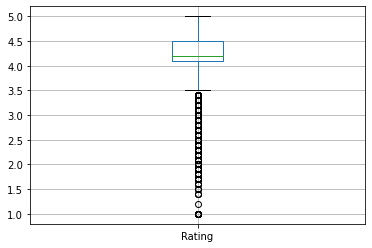

In [ ]:
df1.boxplot();

In [ ]:
df1.shape

(10840, 13)

# now we will change some column datatype 

In [ ]:
df1['Reviews'] = df1['Reviews'].astype(int)


## Changing datatype of 'Price' to float

In [ ]:
df1['Price'] = df1['Price'].apply((lambda x: str(x).replace('$','') if '$' in str(x) else str(x)))
df1['Price'] = df1['Price'].apply((lambda x: str(x).replace('',',') if ',' in str(x) else str(x)))

In [ ]:
df1['Price'] = df1['Price'].astype(float)

In [ ]:
df1['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

## changing datatype of 'Installs' to int

In [ ]:
df1['Installs'] =  df1['Installs'].apply(lambda x: str(x).replace('+', '')if '+' in str(x) else str(x))
df1['Installs'] =  df1['Installs'].apply(lambda x: str(x).replace(',', '')if ',' in str(x) else str(x))

In [ ]:
df1['Installs'] = df1['Installs'].astype(int)


## Changing size type to float

In [ ]:
def kbintomb(size):
  if size[-1] == 'k':
    kb = (size).replace('k','')
    return float(kb)*0.01
  if 'M' in size:
    return ((size).replace('M', ''))
  elif '+' in size:
    return ((size).replace('+','')) 
  else:
      return size

In [ ]:
df1['Size'] = df1['Size'].apply(kbintomb)

In [ ]:
df1['Size'] = df1['Size'].replace('Varies with device', 0)
df1['Size'] = df1['Size'].replace('1,000', 1.000)

df1['Size']= df1['Size'].astype(float)

In [ ]:
df1['Size'].mean()

18.270039206642068

In [ ]:
df1['Size'] = df1['Size'].replace(0, 18.26)

In [ ]:
df1.describe()

,Rating,Reviews,Size,Installs,Price
count,10840.000000,1.084000e+04,10840.000000,1.084000e+04,10840.000000
mean,4.191972,4.441529e+05,21.125270,1.546434e+07,1.027368
std,0.478907,2.927761e+06,20.681814,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.085000,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,6.200000,1.000000e+03,0.000000
50%,4.200000,2.094000e+03,18.000000,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,26.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


## **Remove duplicate rows if any**

In [ ]:
df1[df1.duplicated()].shape

(483, 13)

In [ ]:
df1.drop_duplicates(inplace = True)

In [ ]:
df1.shape

(10357, 13)

# **Lets first see the correlation between all numeric values**

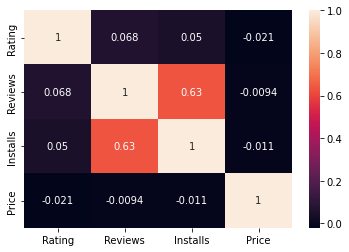

In [ ]:
corr_df = df1[['Rating', 'Reviews', 'Installs', 'Price']]
cormat = corr_df.corr()
sns.heatmap(cormat, annot = True);

In [ ]:
corr_df.corr()

,Rating,Reviews,Installs,Price
Rating,1.000000,0.068363,0.050473,-0.020559
Reviews,0.068363,1.000000,0.634997,-0.009417
Installs,0.050473,0.634997,1.000000,-0.011147
Price,-0.020559,-0.009417,-0.011147,1.000000


# LETS SEE SOME DIRECT QUES

# Q1 WHICH CATEGORY OF APP HAS HIGHEST AND LOWEST RATING

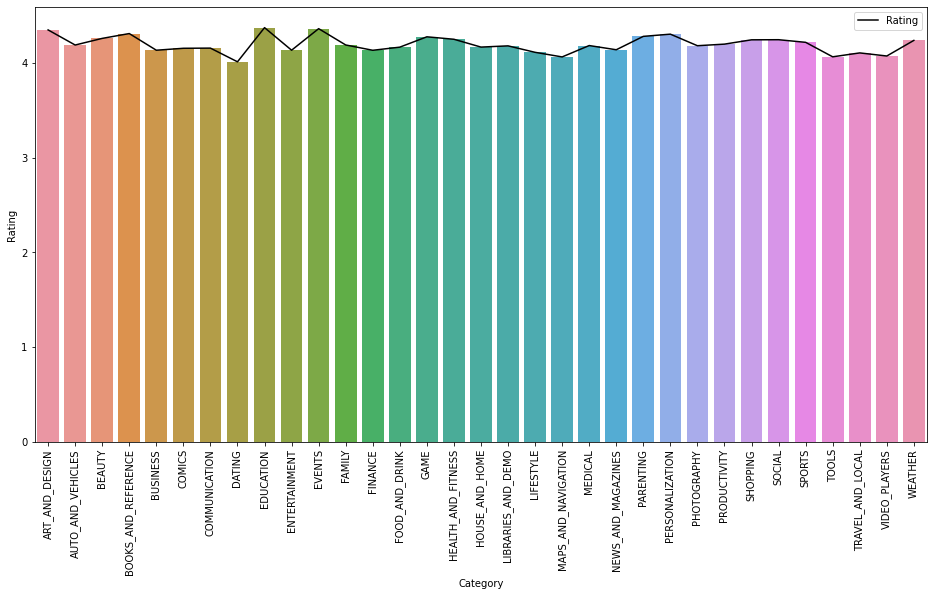

In [ ]:
category_vs_rating = df1.groupby('Category')['Rating'].mean().reset_index()

category_vs_rating.plot(figsize = (16,8), color = 'black')
plt.xticks(rotation = 90)

sns.barplot(x = 'Category', y = 'Rating', data= category_vs_rating);

Every app has almost same ratings but if we talk about exact figures,the Educatation app has highest app rating,
and on the other hand dating apps has lowest rating. (maybe because they are not getting desirable life partner).

## **Q2 WHICH CATEGORY HAS MAXIMUM AND MINIMUM APPS**

In [ ]:
app_no = df1['Category'].value_counts()
app_no.min()

53

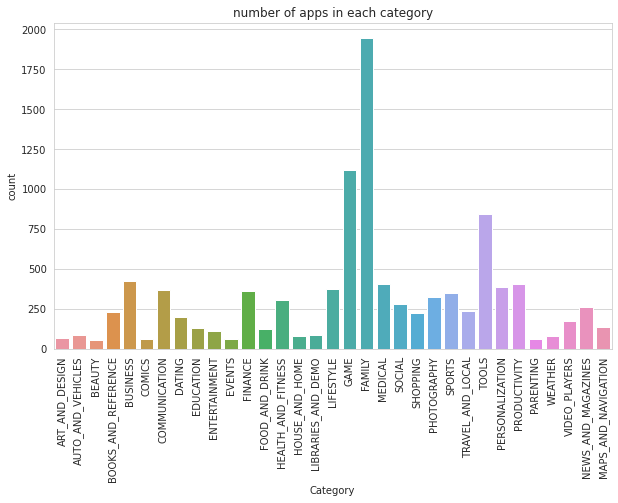

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize = (10,6))
sns.countplot(x= 'Category', data = df1)
plt.xticks(rotation = 90);
plt.title('number of apps in each category');


we can see Family category has the highest no. of apps and second highest apps are in Game.
minimun app are in beauty and comics.

Beauty app are growing these days so developer shoud make beauty related apps.

## **Q3 PERSENTAGE OF PAID APPS AND FREE APPS**

In [ ]:
df1['Type'].sort_values()

0       Free
7220    Free
7221    Free
7222    Free
7223    Free
        ... 
2263    Paid
2262    Paid
4621    Paid
2266    Paid
5414    Paid
Name: Type, Length: 10357, dtype: object

Free    9592
Paid     765
Name: Type, dtype: int64

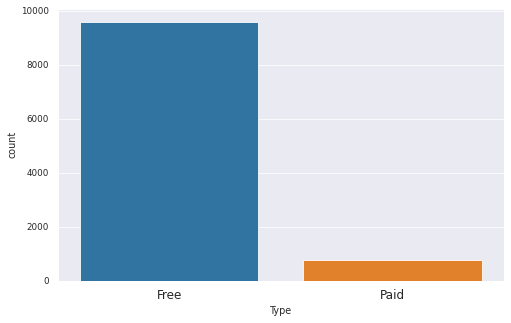

In [ ]:
plt.figure(figsize = (8,5))
sns.countplot(x= 'Type', data = df1)
sns.set_style('dark')
sns.set_context('paper', font_scale = 1)

df1['Type'].value_counts()

## 90% of the apps are free and rest are paid 

# **Q4 WHAT CATEGORY OF SIZED APP HAS HIGHEST INSTALLS**

In [ ]:
def cat_size(x):
  if x<= 50:
    return "Below_50"
  
  elif x> 50:
    return "Above_50"

In [ ]:
df1["size_category"] = df1["Size"].apply(cat_size)

In [ ]:
catsize = df1['size_category'].value_counts()

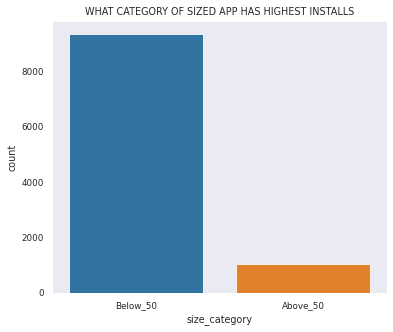

In [ ]:
plt.figure(figsize = (6,5))
plt.title("WHAT CATEGORY OF SIZED APP HAS HIGHEST INSTALLS")
sns.set_style("darkgrid")
sns.set_context(font_scale = 1.4)
sns.countplot(x= "size_category", data = df1);

## Q5 HIGHEST NO OF APP WORKS IN WHICH ANDROID VERSION

In [ ]:
android_versions = df1['Android Ver'].value_counts()[:6]

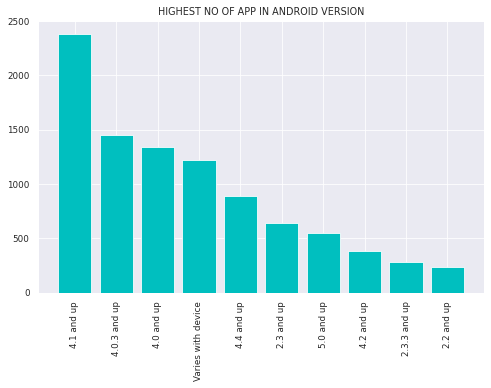

In [ ]:
counts = df1["Android Ver"].value_counts()[:10]
plt.figure(figsize = (8,5))
plt.bar(counts.index, counts.values, color= 'c')
plt.xticks(rotation = 90)
plt.title('HIGHEST NO OF APP IN ANDROID VERSION')
plt.rc("xtick", labelsize = 12)
plt.show()

Maximum no of apps work in 4.1 and above because its the newest version among them.

In [ ]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,Below_50
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Below_50
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,Below_50
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,Below_50
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,Below_50


# WHICH CATEGORY OF APPS HAS HIGHEST INSTALLS

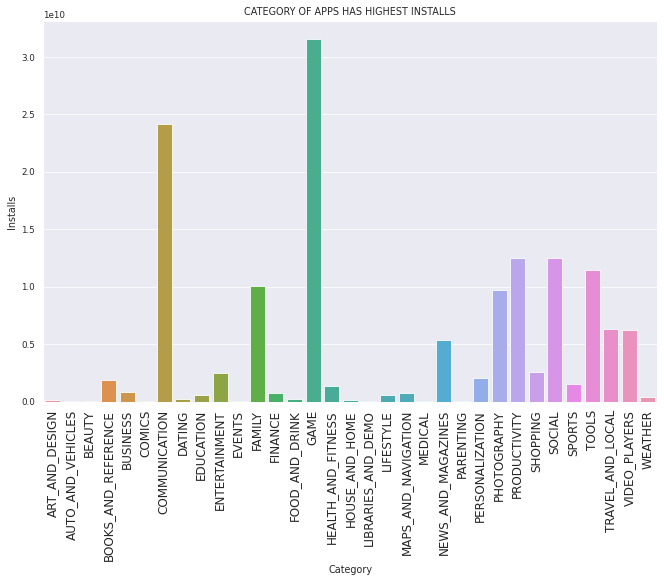

In [ ]:
no_of_installs = df1.groupby(['Category'])['Installs'].sum().reset_index()

plt.figure(figsize = (11,7))

plt.xticks(rotation = 90)
plt.yticks()
sns.barplot(data = no_of_installs, x= 'Category', y= 'Installs')

plt.title('CATEGORY OF APPS HAS HIGHEST INSTALLS');


Games has the highest installs and communication app actegory is running behind games.

# WHICH PAID APP HAS HIGHEST REVENUE

In [ ]:
df1['Revenue'] = df1['Price']*df1['Installs']

In [ ]:
df1['Revenue'].sort_values(ascending = False).head(5)

2241    69900000.0
4347    69900000.0
5351    39999000.0
5356    19999500.0
4034     9900000.0
Name: Revenue, dtype: float64

In [ ]:
top_rev_app = df1.loc[[2241,4347,5351,5356,4034]][['App','Revenue']]


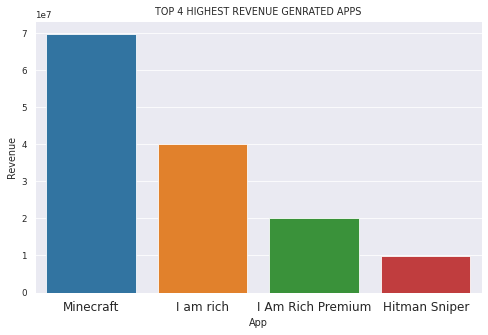

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data = top_rev_app, x= 'App', y= 'Revenue');
plt.title("TOP 4 HIGHEST REVENUE GENRATED APPS");

The highest revenue genrated app is minecraft then i am rich and then i am rich premium 
Minecraft generated= $69900000.0

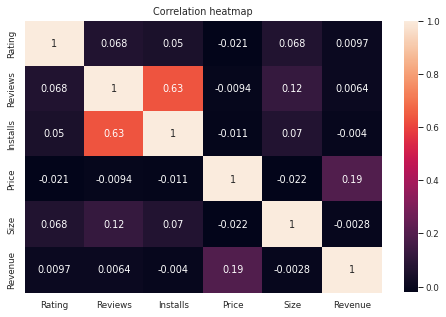

In [ ]:
corr_df = df1[['Rating', 'Reviews', 'Installs', 'Price','Size','Revenue']]
cormat = corr_df.corr()
plt.figure(figsize = (8,5))
plt.title("Correlation heatmap")
sns.heatmap(cormat, annot = True);

In [ ]:
df1.describe()

,Rating,Reviews,Size,Installs,Price,Revenue
count,10357.000000,1.035700e+04,10357.000000,1.035700e+04,10357.000000,1.035700e+04
mean,4.188649,4.059046e+05,20.964511,1.415776e+07,1.030800,3.548053e+04
std,0.484023,2.696778e+06,20.738809,8.023955e+07,16.278625,1.086775e+06
min,1.000000,0.000000e+00,0.085000,0.000000e+00,0.000000,0.000000e+00
25%,4.100000,3.200000e+01,6.000000,1.000000e+03,0.000000,0.000000e+00
50%,4.200000,1.680000e+03,17.000000,1.000000e+05,0.000000,0.000000e+00
75%,4.500000,4.641600e+04,26.000000,1.000000e+06,0.000000,0.000000e+00
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000,6.990000e+07
